<a href="https://colab.research.google.com/github/Rishi-128/ml4sci-anomaly-detection-dqm/blob/main/03_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Anomaly Detection using Reconstruction Error

In this notebook, we evaluate the trained autoencoder by computing reconstruction
errors on both normal and anomalous detector data. A higher reconstruction error
indicates abnormal detector behavior.


In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [2]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [6]:
model = Autoencoder(input_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_data = torch.tensor(normal_data, dtype=torch.float32)

for epoch in range(10):  # quick training
    optimizer.zero_grad()
    output = model(train_data)
    loss = criterion(output, train_data)
    loss.backward()
    optimizer.step()

torch.save(model.state_dict(), "autoencoder.pth")
print("Model trained & saved")


Model trained & saved


In [7]:
np.random.seed(42)

normal_data = np.random.normal(0, 1, size=(10000, 10))
anomalies = np.random.normal(3, 1.5, size=(500, 10))

data = np.vstack([normal_data, anomalies])
labels = np.hstack([
    np.zeros(len(normal_data)),
    np.ones(len(anomalies))
])

data_tensor = torch.tensor(data, dtype=torch.float32)


In [8]:
with torch.no_grad():
    reconstructed = model(data_tensor)
    reconstruction_error = torch.mean((data_tensor - reconstructed) ** 2, dim=1)

errors = reconstruction_error.numpy()


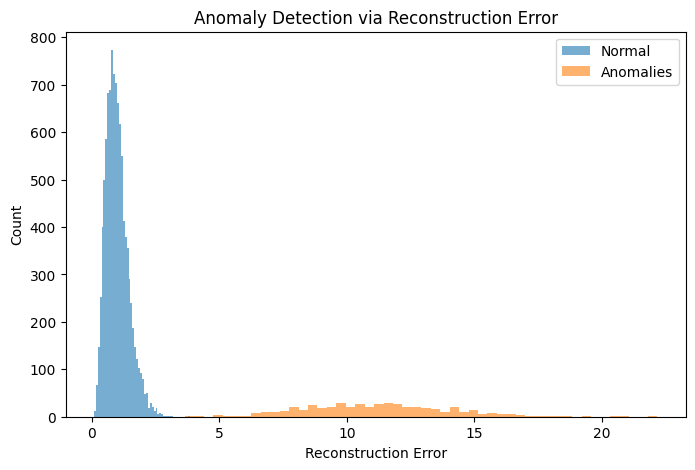

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(errors[labels == 0], bins=50, alpha=0.6, label="Normal")
plt.hist(errors[labels == 1], bins=50, alpha=0.6, label="Anomalies")
plt.xlabel("Reconstruction Error")
plt.ylabel("Count")
plt.legend()
plt.title("Anomaly Detection via Reconstruction Error")
plt.show()


### Results

The reconstruction error distribution shows a clear separation between
normal detector data and anomalous samples. This demonstrates that the
autoencoder successfully learns stable detector behavior and can be
used for anomaly detection in data quality monitoring.
